In [1]:
import numpy as np
from numpy._typing import NDArray
import pandas as pd

In [2]:
from utils import preprocess_data_sample, get_metadata

In [3]:
metadata: pd.DataFrame = get_metadata()
metadata

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


### Bring a data sample

In [4]:
df, target = preprocess_data_sample(53, metadata)

In [5]:
df

,time,v
time_abs(%Y-%m-%dT%H:%M:%S.%f),,
1973-07-04 00:00:00.544000,0.000000,-5.115098e-15
1973-07-04 00:00:00.694943,0.150943,-6.403259e-15
1973-07-04 00:00:00.845887,0.301887,-6.974695e-15
1973-07-04 00:00:00.996830,0.452830,-6.713945e-15
1973-07-04 00:00:01.147774,0.603774,-5.875314e-15
...,...,...
1973-07-04 23:59:59.034566,86398.490566,-1.000036e-15
1973-07-04 23:59:59.185509,86398.641509,-1.432291e-15
1973-07-04 23:59:59.336453,86398.792453,-1.702781e-15


In [6]:
time: NDArray = df['time'].resample('30s').max().values
v: NDArray = df['v'].resample('30s').max().values

In [7]:
def plot(x: NDArray, y: NDArray, target: float) -> None:
    plt.plot(
        x,
        y
    )
    plt.axvline(target, color = 'red')
    plt.show()
    

#### Visualizing the raw dat

In [8]:
import matplotlib.pyplot as plt

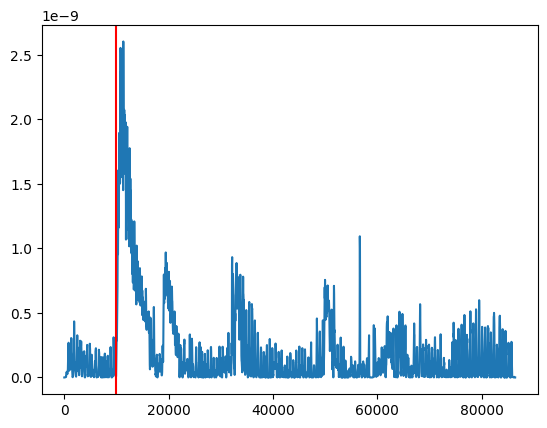

In [9]:
plot(
    time,
    v,
    target
)
plt.show()

## Analysing the waves through fourier analysis

In [10]:
from numpy.fft import fft
from sklearn.preprocessing import StandardScaler
freqs: NDArray = np.abs(fft(v))
normed_freqs: NDArray = StandardScaler().fit_transform(freqs.reshape(-1, 1)).reshape(-1)

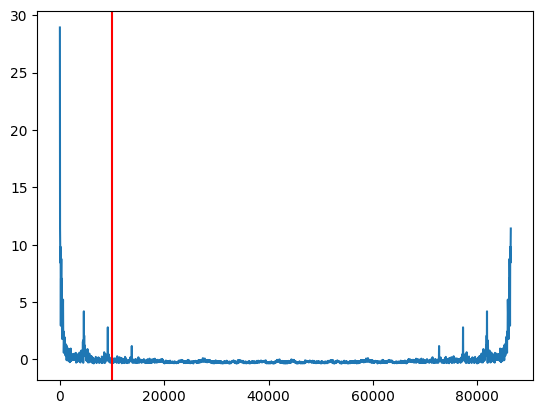

In [11]:
plot(
    time,
    normed_freqs,
    target
)
plt.show()

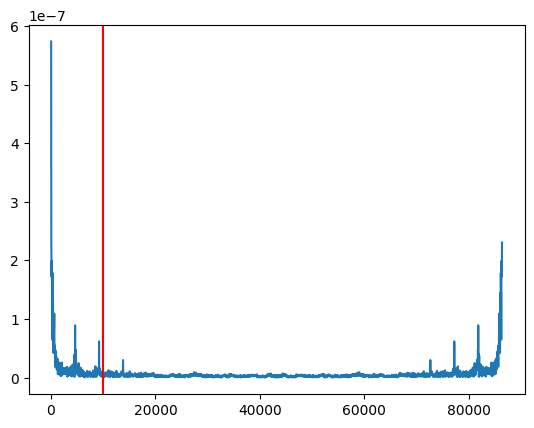

In [12]:
plot(
    time,
    freqs,
    target
)

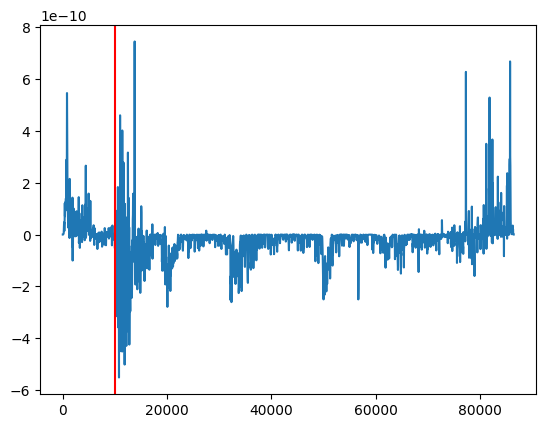

In [13]:
hadamard: NDArray = v * normed_freqs
plot(
    time,
    hadamard,
    target
)

## Applying gaussian filters to the data

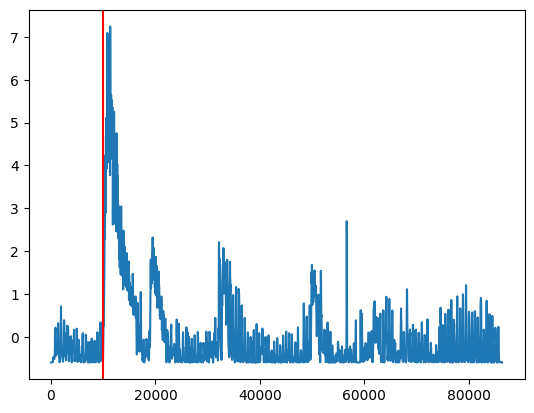

In [14]:
from scipy.ndimage import gaussian_filter
filtered: NDArray = gaussian_filter(v, v.std())
normed_filtered:NDArray = StandardScaler().fit_transform(filtered.reshape(-1, 1)).reshape(-1)
plot(
    time,
    normed_filtered,
    target
)

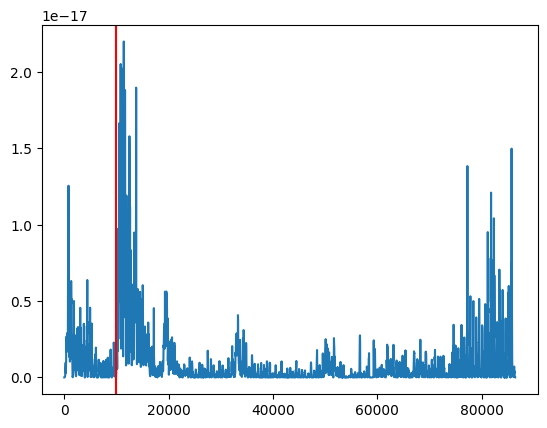

In [15]:
plot(
    time,
    filtered * freqs,
    target
)

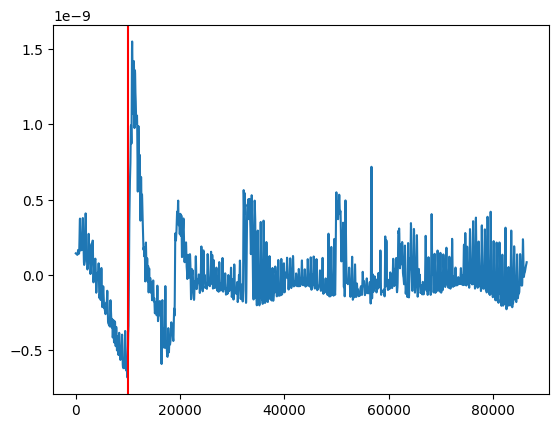

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a
    
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

plot(
    time,
    bandpass_filter(v, 0.1, 10, fs = 59),
    target
)

## Total variance analysis

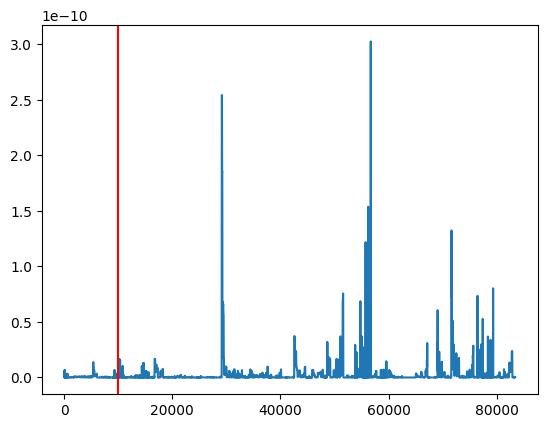

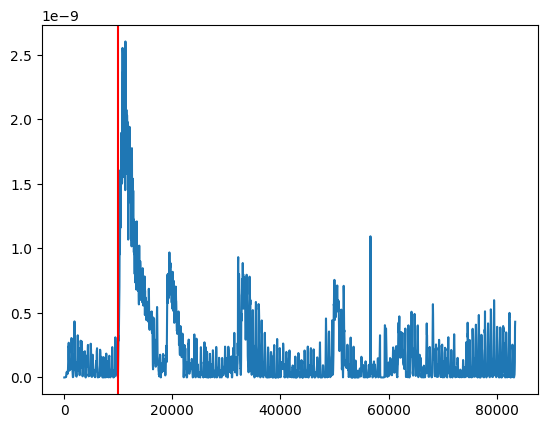

In [17]:
from utils import tv_analysis
chunk_size: int = 100
plot(
    time[:-chunk_size],
    tv_analysis(chunk_size, v).reshape(-1, 1),
    target
)
plot(
    time[:-chunk_size],
    v[:-chunk_size].reshape(-1,1),
    target
  
)